In [1]:
from sodapy import Socrata
import pandas as pd

# Conexión a la API de Socrata
client = Socrata("www.datos.gov.co", None)

P1 = "GASOLINA MOTOR CORRIENTE"
P2 = "BIODIESEL CON MEZCLA"
P3 = "GASOLINA MOTOR EXTRA"

C1 = "COMERCIALIZADOR INDUSTRIAL"
C2 = "ESTACION DE SERVICIO AUTOMOTRIZ"
C3 = "ESTACION DE SERVICIO FLUVIAL"

# ID del dataset: fbht-2fzd
dataset = "339g-zjac"
query = (
        f"SELECT SUM(volumen_despachado) as volumen_total, anio_despacho, mes_despacho, producto, departamento, municipio "
        f"WHERE subtipo_comprador IN ( '{C1}', '{C2}', '{C3}' ) "
        f"AND producto IN ('{P1}', '{P2}', '{P3}') "
        f"GROUP BY anio_despacho, mes_despacho, producto, departamento, municipio "
        f"ORDER BY anio_despacho ASC "
        f"LIMIT 250000"
    )
consumo = client.get(dataset, query=query)
df_consumo = pd.DataFrame.from_records(consumo)
print(len(df_consumo))

121318


In [2]:
# Crear una copia del dataframe original filtrado para el municipio de Cali
df_cali = df_consumo[df_consumo['municipio'] == 'CALI'].copy()

# Crear una copia del dataframe original filtrado para el departamento del Valle
df_valle = df_consumo[df_consumo['departamento'] == 'VALLE DEL CAUCA'].copy()

# Mostrar información sobre los dataframes creados
print('-'*50)
print(f"DataFrame para Cali:")
print(f"- Número de registros: {len(df_cali)}")
if len(df_cali) > 0:
    print(f"- Productos: {df_cali['producto'].unique()}")
    print(f"- Rango de años: {df_cali['anio_despacho'].min()} - {df_cali['anio_despacho'].max()}")
    print(f"- Primeros registros:")
    print(df_cali.head())
else:
    print("No se encontraron registros para Cali")

print('\n' + '-'*50)
print(f"DataFrame para Valle del Cauca:")
print(f"- Número de registros: {len(df_valle)}")
if len(df_valle) > 0:
    print(f"- Productos: {df_valle['producto'].unique()}")
    print(f"- Rango de años: {df_valle['anio_despacho'].min()} - {df_valle['anio_despacho'].max()}")
    print(f"- Primeros registros:")
    print(df_valle.head())
else:
    print("No se encontraron registros para Valle del Cauca")

--------------------------------------------------
DataFrame para Cali:
- Número de registros: 171
- Productos: ['GASOLINA MOTOR EXTRA' 'GASOLINA MOTOR CORRIENTE' 'BIODIESEL CON MEZCLA']
- Rango de años: 2021 - 2025
- Primeros registros:
     volumen_total anio_despacho mes_despacho                  producto  \
185         345555          2021           08      GASOLINA MOTOR EXTRA   
1319        338998          2021           03      GASOLINA MOTOR EXTRA   
1972        360324          2021           12      GASOLINA MOTOR EXTRA   
2014        126614          2021           05      GASOLINA MOTOR EXTRA   
4445       9507803          2021           10  GASOLINA MOTOR CORRIENTE   

         departamento municipio  
185   VALLE DEL CAUCA      CALI  
1319  VALLE DEL CAUCA      CALI  
1972  VALLE DEL CAUCA      CALI  
2014  VALLE DEL CAUCA      CALI  
4445  VALLE DEL CAUCA      CALI  

--------------------------------------------------
DataFrame para Valle del Cauca:
- Número de registros: 

La carpeta 'graficas_evento_cali' ya existe.
Productos disponibles en Cali: ['GASOLINA MOTOR EXTRA' 'GASOLINA MOTOR CORRIENTE' 'BIODIESEL CON MEZCLA']
Rango de fechas original: 2021-01-01 00:00:00 - 2025-09-01 00:00:00
Rango de fechas después del filtrado: 2021-01-01 00:00:00 - 2025-06-01 00:00:00
Se eliminaron 9 registros correspondientes al T3 de 2025.


C:\Users\raule\AppData\Local\Temp\ipykernel_8412\1812347018.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_extra_cali.png


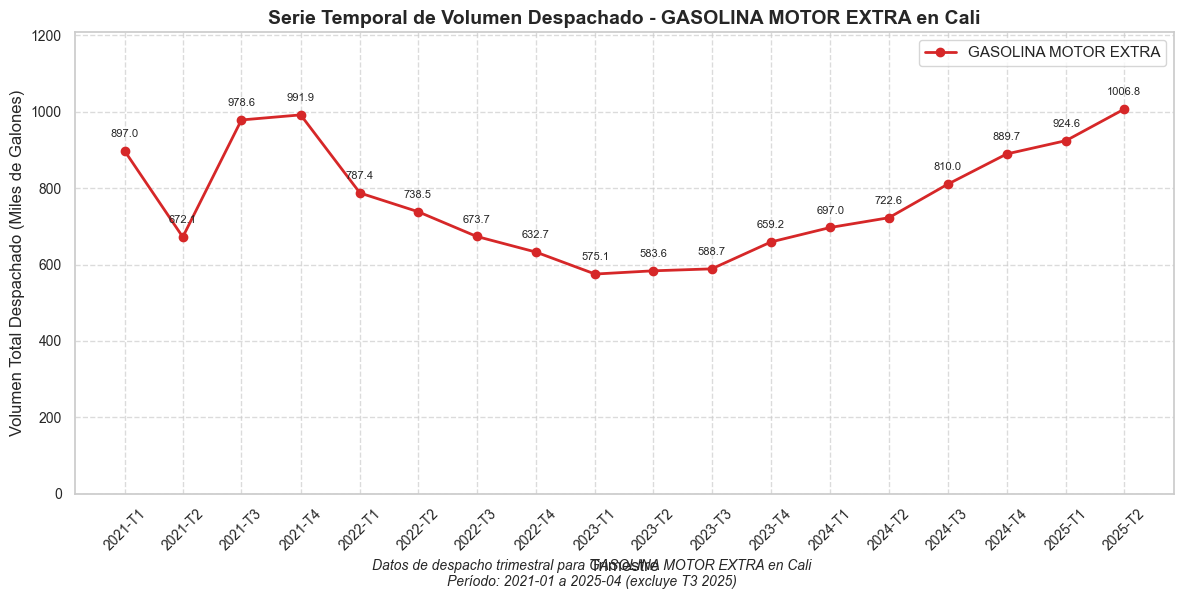

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\1812347018.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_corriente_cali.png


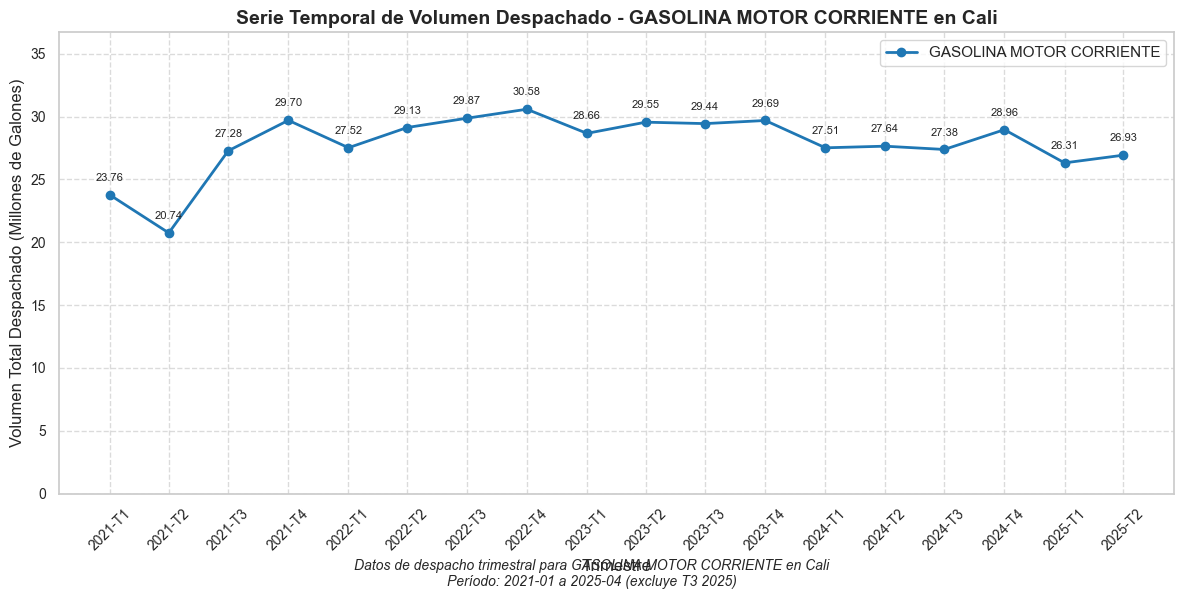

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\1812347018.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_biodiesel_con_mezcla_cali.png


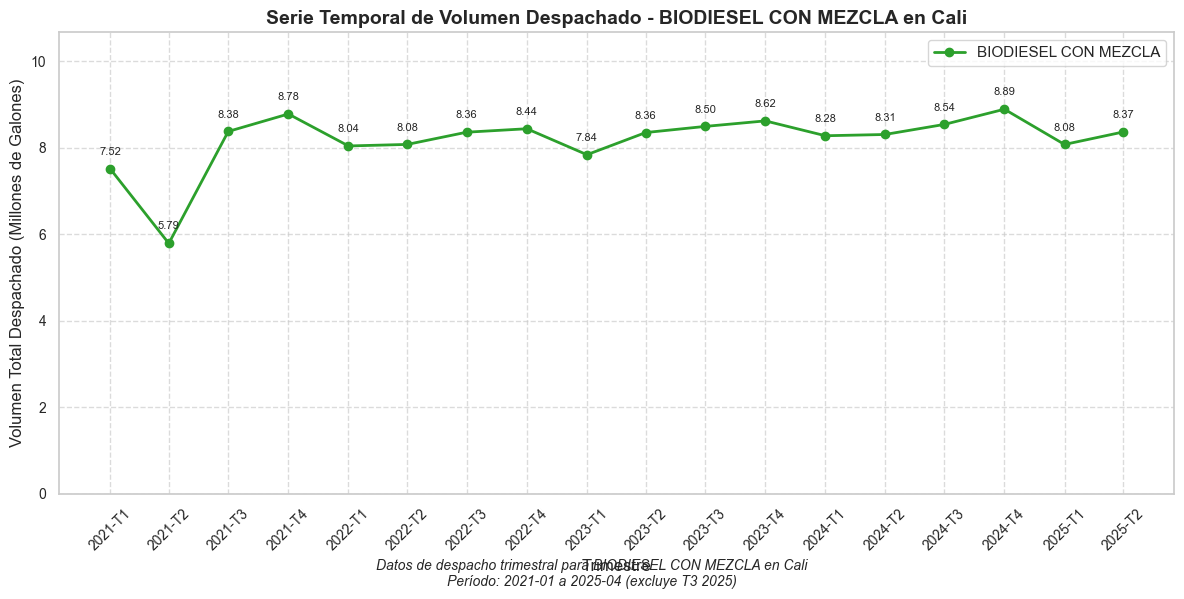


Todas las gráficas han sido guardadas en la carpeta 'graficas_evento_cali'


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Crear la carpeta para guardar las gráficas si no existe
carpeta_graficas = "graficas_evento_cali"
if not os.path.exists(carpeta_graficas):
    os.makedirs(carpeta_graficas)
    print(f"Carpeta '{carpeta_graficas}' creada correctamente.")
else:
    print(f"La carpeta '{carpeta_graficas}' ya existe.")

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Convertir columnas a tipos numéricos
df_cali['anio_despacho'] = pd.to_numeric(df_cali['anio_despacho'])
df_cali['mes_despacho'] = pd.to_numeric(df_cali['mes_despacho'])
df_cali['volumen_total'] = pd.to_numeric(df_cali['volumen_total'], errors='coerce')

# Crear columna de fecha combinando año y mes para facilitar agrupación por trimestres
df_cali['fecha'] = pd.to_datetime(df_cali['anio_despacho'].astype(str) + '-' +
                                 df_cali['mes_despacho'].astype(str).str.zfill(2) + '-01')

# Verificar datos disponibles
print(f"Productos disponibles en Cali: {df_cali['producto'].unique()}")
print(f"Rango de fechas original: {df_cali['fecha'].min()} - {df_cali['fecha'].max()}")

# Filtrar para descartar datos del tercer trimestre de 2025 (julio a septiembre)
fecha_corte = pd.Timestamp('2025-07-01')
df_cali_filtrado = df_cali[df_cali['fecha'] < fecha_corte].copy()

print(f"Rango de fechas después del filtrado: {df_cali_filtrado['fecha'].min()} - {df_cali_filtrado['fecha'].max()}")
print(f"Se eliminaron {len(df_cali) - len(df_cali_filtrado)} registros correspondientes al T3 de 2025.")

# Agregar columna de trimestre para agrupación
df_cali_filtrado['trimestre'] = df_cali_filtrado['fecha'].dt.to_period('Q')

# Agrupar por trimestre y producto
df_trimestral = df_cali_filtrado.groupby(['trimestre', 'producto'])['volumen_total'].sum().reset_index()

# Convertir el trimestre de Period a datetime para graficar
df_trimestral['fecha_trimestre'] = df_trimestral['trimestre'].apply(lambda x: x.to_timestamp())

# Definir una paleta de colores para los productos
colores = {
    'GASOLINA MOTOR CORRIENTE': '#1f77b4',  # Azul
    'BIODIESEL CON MEZCLA': '#2ca02c',      # Verde
    'GASOLINA MOTOR EXTRA': '#d62728'       # Rojo
}

# Obtener la lista de productos disponibles
productos = df_cali_filtrado['producto'].unique()

# Crear un gráfico para cada producto con las unidades adecuadas
for producto in productos:
    # Filtrar datos para el producto actual
    datos_producto = df_trimestral[df_trimestral['producto'] == producto]

    # Ajustar los valores según el producto
    if producto == 'GASOLINA MOTOR EXTRA':
        # Convertir a miles de galones
        factor = 1000
        unidad = 'Miles de Galones'
    else:
        # Convertir a millones de galones
        factor = 1000000
        unidad = 'Millones de Galones'

    datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar línea de tendencia
    ax.plot(datos_producto['fecha_trimestre'], datos_producto['volumen_ajustado'],
            marker='o', linestyle='-', linewidth=2,
            color=colores.get(producto, 'gray'),
            label=producto)

    # Añadir etiquetas y título
    ax.set_title(f'Serie Temporal de Volumen Despachado - {producto} en Cali', fontweight='bold')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel(f'Volumen Total Despachado ({unidad})')

    # Crear etiquetas de trimestre personalizadas
    fechas = datos_producto['fecha_trimestre'].tolist()
    etiquetas = []

    for fecha in fechas:
        # Calcular el trimestre (1-4) basado en el mes
        trimestre = (fecha.month - 1) // 3 + 1
        etiqueta = f"{fecha.year}-T{trimestre}"
        etiquetas.append(etiqueta)

    # Establecer ubicaciones y etiquetas personalizadas
    plt.xticks(datos_producto['fecha_trimestre'], etiquetas, rotation=45)

    # Añadir cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Añadir leyenda
    ax.legend()

    # Añadir anotaciones de valores en los puntos
    for x, y, valor_original in zip(datos_producto['fecha_trimestre'],
                                    datos_producto['volumen_ajustado'],
                                    datos_producto['volumen_total']):
        if producto == 'GASOLINA MOTOR EXTRA':
            # Para valores en miles, mostramos con 1 decimal
            ax.annotate(f'{y:.1f}',
                       (x, y),
                       textcoords="offset points",
                       xytext=(0, 10),
                       ha='center',
                       fontsize=8)
        else:
            # Para valores en millones, mostramos con 2 decimales
            ax.annotate(f'{y:.2f}',
                       (x, y),
                       textcoords="offset points",
                       xytext=(0, 10),
                       ha='center',
                       fontsize=8)

    # Ajustar los límites del eje Y para que comience desde cero
    ax.set_ylim(bottom=0, top=datos_producto['volumen_ajustado'].max() * 1.2)

    # Añadir información contextual
    plt.figtext(0.5, 0.01,
                f'Datos de despacho trimestral para {producto} en Cali\n'
                f'Período: {datos_producto["fecha_trimestre"].min().strftime("%Y-%m")} a '
                f'{datos_producto["fecha_trimestre"].max().strftime("%Y-%m")} (excluye T3 2025)',
                ha='center', fontsize=10, style='italic')

    # Ajustar diseño
    plt.tight_layout()

    # Generar un nombre de archivo basado en el producto
    nombre_archivo = producto.replace(" ", "_").lower()
    ruta_archivo = os.path.join(carpeta_graficas, f"serie_temporal_{nombre_archivo}_cali.png")

    # Guardar la figura en formato PNG
    plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')
    print(f"Gráfica guardada como: {ruta_archivo}")

    # Mostrar gráfico
    plt.show()

print(f"\nTodas las gráficas han sido guardadas en la carpeta '{carpeta_graficas}'")

La carpeta 'graficas_evento_cali' ya existe.
Productos disponibles en Valle: ['GASOLINA MOTOR CORRIENTE' 'GASOLINA MOTOR EXTRA' 'BIODIESEL CON MEZCLA']
Rango de fechas original: 2021-01-01 00:00:00 - 2025-09-01 00:00:00
Rango de fechas después del filtrado: 2021-01-01 00:00:00 - 2025-06-01 00:00:00
Se eliminaron 274 registros correspondientes al T3 de 2025.


C:\Users\raule\AppData\Local\Temp\ipykernel_8412\285919556.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_corriente_valle.png


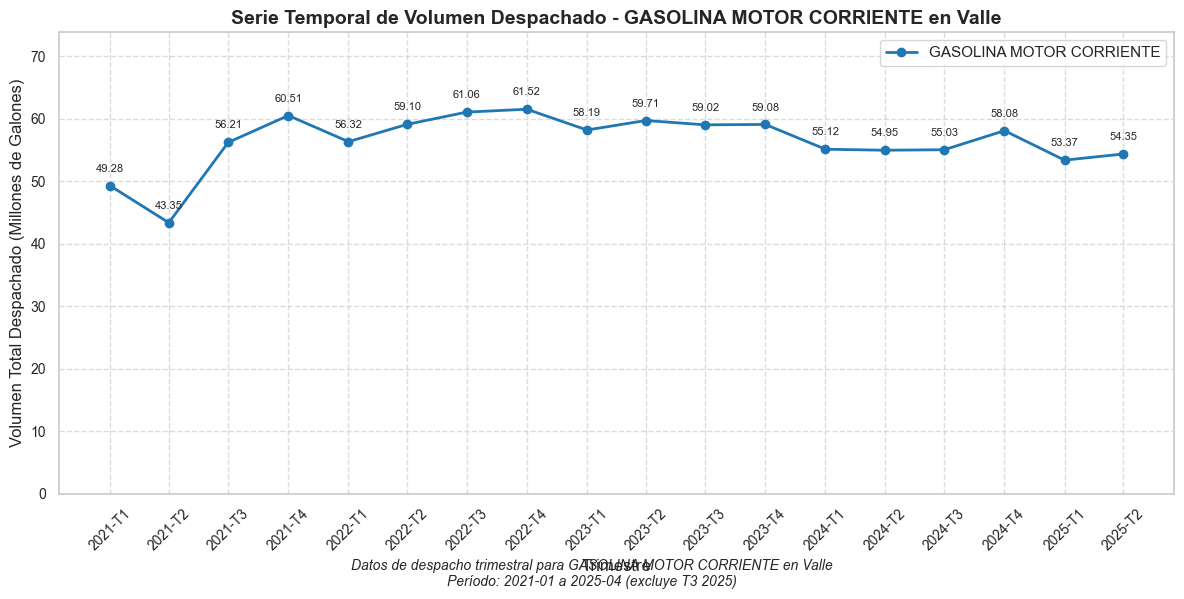

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\285919556.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_extra_valle.png


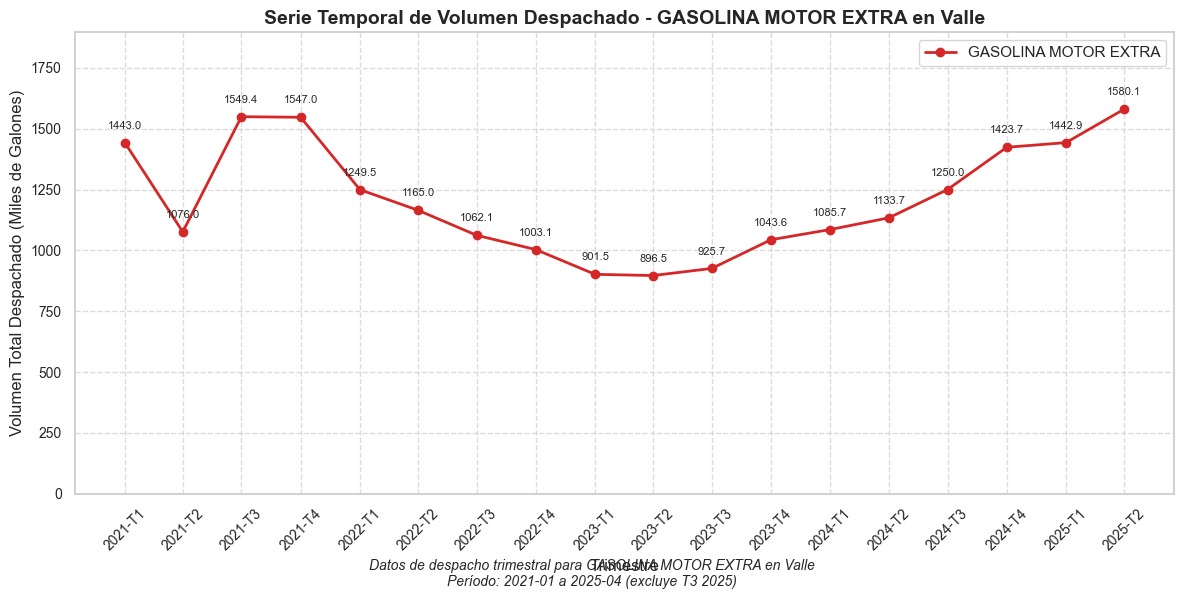

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\285919556.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_biodiesel_con_mezcla_valle.png


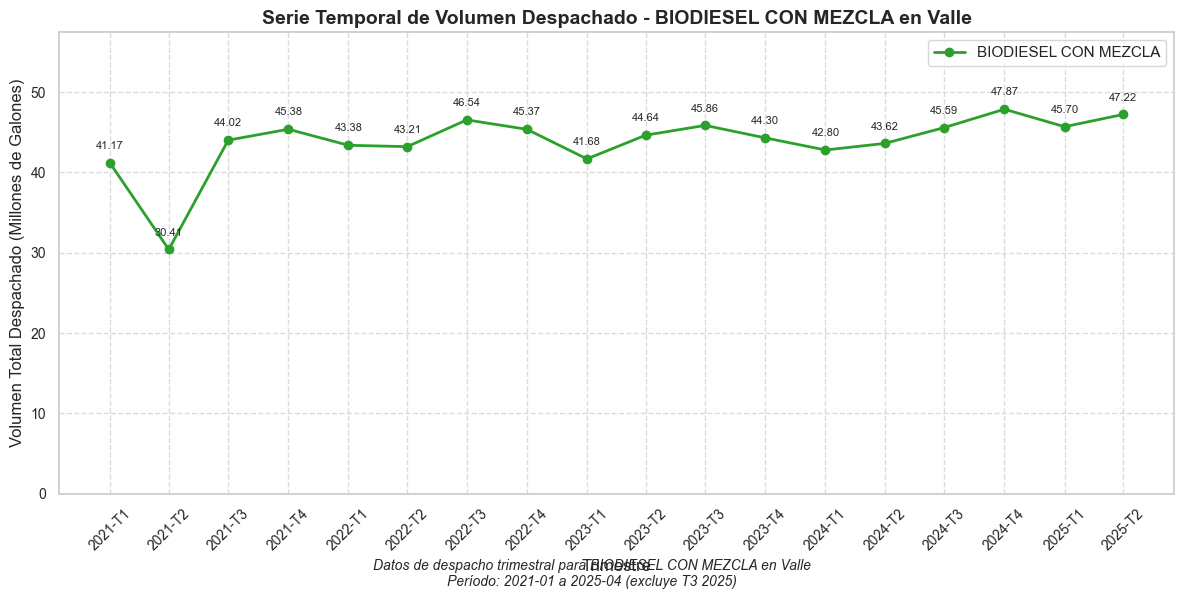


Todas las gráficas para Valle han sido guardadas en la carpeta 'graficas_evento_cali'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Crear la carpeta para guardar las gráficas si no existe
carpeta_graficas = "graficas_evento_cali"
if not os.path.exists(carpeta_graficas):
    os.makedirs(carpeta_graficas)
    print(f"Carpeta '{carpeta_graficas}' creada correctamente.")
else:
    print(f"La carpeta '{carpeta_graficas}' ya existe.")

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Convertir columnas a tipos numéricos
df_valle['anio_despacho'] = pd.to_numeric(df_valle['anio_despacho'])
df_valle['mes_despacho'] = pd.to_numeric(df_valle['mes_despacho'])
df_valle['volumen_total'] = pd.to_numeric(df_valle['volumen_total'], errors='coerce')

# Crear columna de fecha combinando año y mes para facilitar agrupación por trimestres
df_valle['fecha'] = pd.to_datetime(df_valle['anio_despacho'].astype(str) + '-' +
                                 df_valle['mes_despacho'].astype(str).str.zfill(2) + '-01')

# Verificar datos disponibles
print(f"Productos disponibles en Valle: {df_valle['producto'].unique()}")
print(f"Rango de fechas original: {df_valle['fecha'].min()} - {df_valle['fecha'].max()}")

# Filtrar para descartar datos del tercer trimestre de 2025 (julio a septiembre)
fecha_corte = pd.Timestamp('2025-07-01')
df_valle_filtrado = df_valle[df_valle['fecha'] < fecha_corte].copy()

print(f"Rango de fechas después del filtrado: {df_valle_filtrado['fecha'].min()} - {df_valle_filtrado['fecha'].max()}")
print(f"Se eliminaron {len(df_valle) - len(df_valle_filtrado)} registros correspondientes al T3 de 2025.")

# Agregar columna de trimestre para agrupación
df_valle_filtrado['trimestre'] = df_valle_filtrado['fecha'].dt.to_period('Q')

# Agrupar por trimestre y producto
df_trimestral = df_valle_filtrado.groupby(['trimestre', 'producto'])['volumen_total'].sum().reset_index()

# Convertir el trimestre de Period a datetime para graficar
df_trimestral['fecha_trimestre'] = df_trimestral['trimestre'].apply(lambda x: x.to_timestamp())

# Definir una paleta de colores para los productos
colores = {
    'GASOLINA MOTOR CORRIENTE': '#1f77b4',  # Azul
    'BIODIESEL CON MEZCLA': '#2ca02c',      # Verde
    'GASOLINA MOTOR EXTRA': '#d62728'       # Rojo
}

# Obtener la lista de productos disponibles
productos = df_valle_filtrado['producto'].unique()

# Crear un gráfico para cada producto con las unidades adecuadas
for producto in productos:
    # Filtrar datos para el producto actual
    datos_producto = df_trimestral[df_trimestral['producto'] == producto]

    # Ajustar los valores según el producto
    if producto == 'GASOLINA MOTOR EXTRA':
        # Convertir a miles de galones
        factor = 1000
        unidad = 'Miles de Galones'
    else:
        # Convertir a millones de galones
        factor = 1000000
        unidad = 'Millones de Galones'

    datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar línea de tendencia
    ax.plot(datos_producto['fecha_trimestre'], datos_producto['volumen_ajustado'],
            marker='o', linestyle='-', linewidth=2,
            color=colores.get(producto, 'gray'),
            label=producto)

    # Añadir etiquetas y título
    ax.set_title(f'Serie Temporal de Volumen Despachado - {producto} en Valle', fontweight='bold')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel(f'Volumen Total Despachado ({unidad})')

    # Crear etiquetas de trimestre personalizadas
    fechas = datos_producto['fecha_trimestre'].tolist()
    etiquetas = []

    for fecha in fechas:
        # Calcular el trimestre (1-4) basado en el mes
        trimestre = (fecha.month - 1) // 3 + 1
        etiqueta = f"{fecha.year}-T{trimestre}"
        etiquetas.append(etiqueta)

    # Establecer ubicaciones y etiquetas personalizadas
    plt.xticks(datos_producto['fecha_trimestre'], etiquetas, rotation=45)

    # Añadir cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Añadir leyenda
    ax.legend()

    # Añadir anotaciones de valores en los puntos
    for x, y, valor_original in zip(datos_producto['fecha_trimestre'],
                                    datos_producto['volumen_ajustado'],
                                    datos_producto['volumen_total']):
        if producto == 'GASOLINA MOTOR EXTRA':
            # Para valores en miles, mostramos con 1 decimal
            ax.annotate(f'{y:.1f}',
                       (x, y),
                       textcoords="offset points",
                       xytext=(0, 10),
                       ha='center',
                       fontsize=8)
        else:
            # Para valores en millones, mostramos con 2 decimales
            ax.annotate(f'{y:.2f}',
                       (x, y),
                       textcoords="offset points",
                       xytext=(0, 10),
                       ha='center',
                       fontsize=8)

    # Ajustar los límites del eje Y para que comience desde cero
    ax.set_ylim(bottom=0, top=datos_producto['volumen_ajustado'].max() * 1.2)

    # Añadir información contextual
    plt.figtext(0.5, 0.01,
                f'Datos de despacho trimestral para {producto} en Valle\n'
                f'Período: {datos_producto["fecha_trimestre"].min().strftime("%Y-%m")} a '
                f'{datos_producto["fecha_trimestre"].max().strftime("%Y-%m")} (excluye T3 2025)',
                ha='center', fontsize=10, style='italic')

    # Ajustar diseño
    plt.tight_layout()

    # Generar un nombre de archivo basado en el producto
    nombre_archivo = producto.replace(" ", "_").lower()
    ruta_archivo = os.path.join(carpeta_graficas, f"serie_temporal_{nombre_archivo}_valle.png")

    # Guardar la figura en formato PNG
    plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')
    print(f"Gráfica guardada como: {ruta_archivo}")

    # Mostrar gráfico
    plt.show()

print(f"\nTodas las gráficas para Valle han sido guardadas en la carpeta '{carpeta_graficas}'")

La carpeta 'graficas_evento_cali' ya existe.
Creando DataFrame a nivel nacional usando los datos existentes...
Productos disponibles a nivel Nacional: ['BIODIESEL CON MEZCLA' 'GASOLINA MOTOR CORRIENTE' 'GASOLINA MOTOR EXTRA']
Rango de fechas original: 2021-01-01 00:00:00 - 2025-09-01 00:00:00
Años disponibles: [np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
Rango de fechas después del filtrado: 2021-01-01 00:00:00 - 2025-06-01 00:00:00
Se eliminaron 9 registros correspondientes al T3 2025.


C:\Users\raule\AppData\Local\Temp\ipykernel_8412\832239367.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_biodiesel_con_mezcla_nacional.png


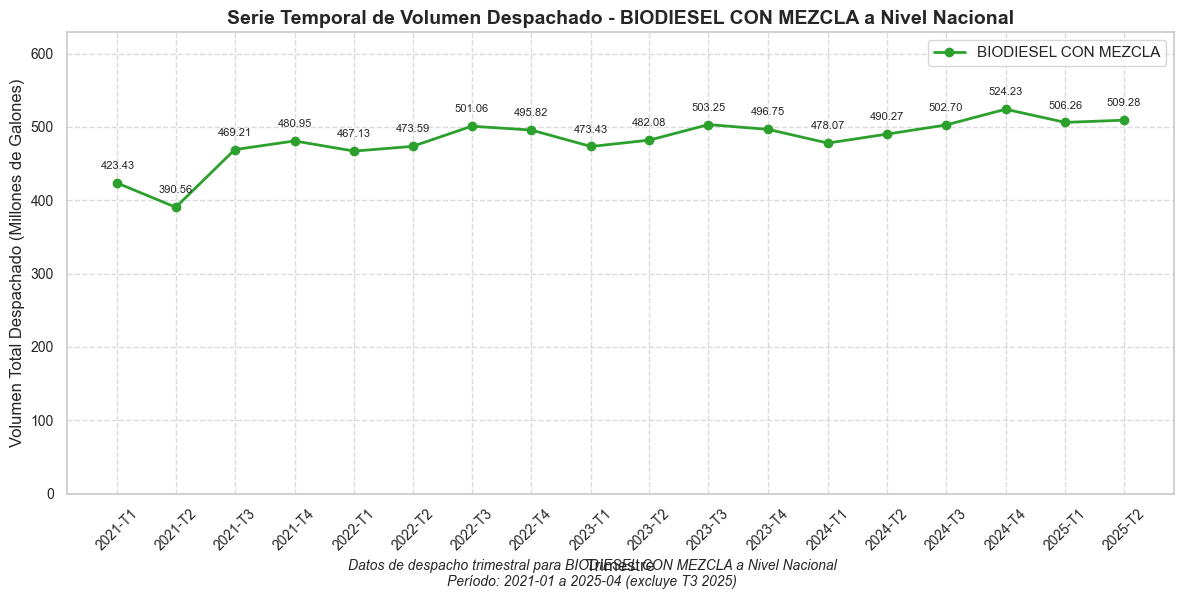

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\832239367.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_corriente_nacional.png


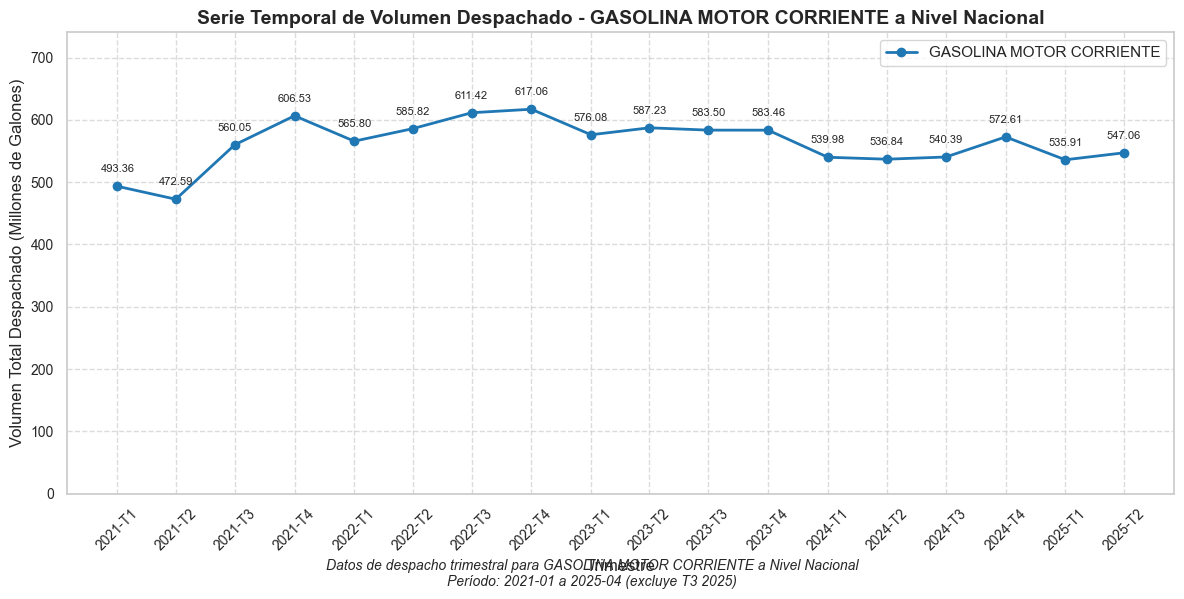

C:\Users\raule\AppData\Local\Temp\ipykernel_8412\832239367.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor


Gráfica guardada como: graficas_evento_cali\serie_temporal_gasolina_motor_extra_nacional.png


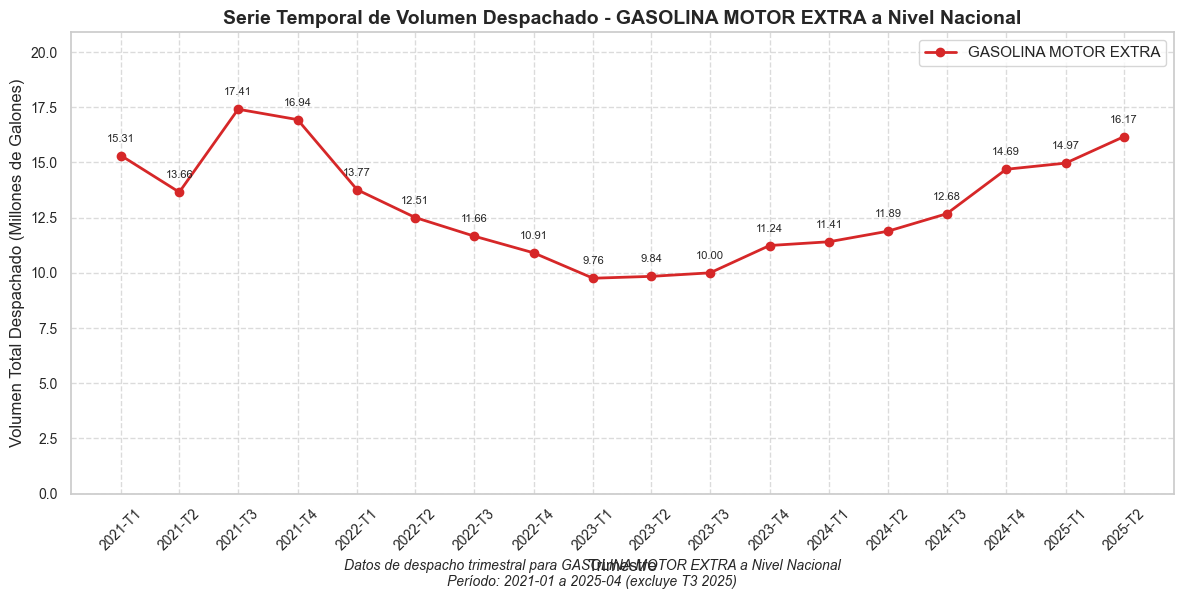


Todas las gráficas para nivel Nacional han sido guardadas en la carpeta 'graficas_evento_cali'


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Crear la carpeta para guardar las gráficas si no existe
carpeta_graficas = "graficas_evento_cali"
if not os.path.exists(carpeta_graficas):
    os.makedirs(carpeta_graficas)
    print(f"Carpeta '{carpeta_graficas}' creada correctamente.")
else:
    print(f"La carpeta '{carpeta_graficas}' ya existe.")

# Configuración de estilo para los gráficos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Crear un DataFrame a nivel nacional agrupando los datos existentes
print("Creando DataFrame a nivel nacional usando los datos existentes...")

# Convertir columnas a tipos numéricos si no lo están ya
df_consumo['anio_despacho'] = pd.to_numeric(df_consumo['anio_despacho'])
df_consumo['mes_despacho'] = pd.to_numeric(df_consumo['mes_despacho'])
df_consumo['volumen_total'] = pd.to_numeric(df_consumo['volumen_total'], errors='coerce')

# Agrupar por año, mes y producto para obtener los totales nacionales
df_nacional = df_consumo.groupby(['anio_despacho', 'mes_despacho', 'producto'])['volumen_total'].sum().reset_index()

# Crear columna de fecha combinando año y mes para facilitar agrupación por trimestres
df_nacional['fecha'] = pd.to_datetime(df_nacional['anio_despacho'].astype(str) + '-' +
                                     df_nacional['mes_despacho'].astype(str).str.zfill(2) + '-01')

# Verificar datos disponibles
print(f"Productos disponibles a nivel Nacional: {df_nacional['producto'].unique()}")
print(f"Rango de fechas original: {df_nacional['fecha'].min()} - {df_nacional['fecha'].max()}")
print(f"Años disponibles: {sorted(df_nacional['anio_despacho'].unique())}")

# Filtrar para descartar datos del tercer trimestre de 2025 (julio a septiembre)
fecha_corte = pd.Timestamp('2025-07-01')
df_nacional_filtrado = df_nacional[df_nacional['fecha'] < fecha_corte].copy()

print(f"Rango de fechas después del filtrado: {df_nacional_filtrado['fecha'].min()} - {df_nacional_filtrado['fecha'].max()}")
print(f"Se eliminaron {len(df_nacional) - len(df_nacional_filtrado)} registros correspondientes al T3 2025.")

# Agregar columna de trimestre para agrupación
df_nacional_filtrado['trimestre'] = df_nacional_filtrado['fecha'].dt.to_period('Q')

# Agrupar por trimestre y producto
df_trimestral = df_nacional_filtrado.groupby(['trimestre', 'producto'])['volumen_total'].sum().reset_index()

# Convertir el trimestre de Period a datetime para graficar
df_trimestral['fecha_trimestre'] = df_trimestral['trimestre'].apply(lambda x: x.to_timestamp())

# Definir una paleta de colores para los productos
colores = {
    'GASOLINA MOTOR CORRIENTE': '#1f77b4',  # Azul
    'BIODIESEL CON MEZCLA': '#2ca02c',      # Verde
    'GASOLINA MOTOR EXTRA': '#d62728'       # Rojo
}

# Obtener la lista de productos disponibles
productos = df_nacional_filtrado['producto'].unique()

# Crear un gráfico para cada producto con las unidades adecuadas
for producto in productos:
    # Filtrar datos para el producto actual
    datos_producto = df_trimestral[df_trimestral['producto'] == producto]

    # Ajustar los valores a millones de galones para todos los productos
    factor = 1000000
    unidad = 'Millones de Galones'

    datos_producto['volumen_ajustado'] = datos_producto['volumen_total'] / factor

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 6))

    # Graficar línea de tendencia
    ax.plot(datos_producto['fecha_trimestre'], datos_producto['volumen_ajustado'],
            marker='o', linestyle='-', linewidth=2,
            color=colores.get(producto, 'gray'),
            label=producto)

    # Añadir etiquetas y título
    ax.set_title(f'Serie Temporal de Volumen Despachado - {producto} a Nivel Nacional', fontweight='bold')
    ax.set_xlabel('Trimestre')
    ax.set_ylabel(f'Volumen Total Despachado ({unidad})')

    # Crear etiquetas de trimestre personalizadas
    fechas = datos_producto['fecha_trimestre'].tolist()
    etiquetas = []

    for fecha in fechas:
        # Calcular el trimestre (1-4) basado en el mes
        trimestre = (fecha.month - 1) // 3 + 1
        etiqueta = f"{fecha.year}-T{trimestre}"
        etiquetas.append(etiqueta)

    # Establecer ubicaciones y etiquetas personalizadas
    plt.xticks(datos_producto['fecha_trimestre'], etiquetas, rotation=45)

    # Añadir cuadrícula
    ax.grid(True, linestyle='--', alpha=0.7)

    # Añadir leyenda
    ax.legend()

    # Añadir anotaciones de valores en los puntos
    for x, y, valor_original in zip(datos_producto['fecha_trimestre'],
                                    datos_producto['volumen_ajustado'],
                                    datos_producto['volumen_total']):
        # Para todos los productos, mostrar con 2 decimales (en millones)
        ax.annotate(f'{y:.2f}',
                   (x, y),
                   textcoords="offset points",
                   xytext=(0, 10),
                   ha='center',
                   fontsize=8)

    # Ajustar los límites del eje Y para que comience desde cero
    ax.set_ylim(bottom=0, top=datos_producto['volumen_ajustado'].max() * 1.2)

    # Añadir información contextual
    plt.figtext(0.5, 0.01,
                f'Datos de despacho trimestral para {producto} a Nivel Nacional\n'
                f'Período: {datos_producto["fecha_trimestre"].min().strftime("%Y-%m")} a '
                f'{datos_producto["fecha_trimestre"].max().strftime("%Y-%m")} (excluye T3 2025)',
                ha='center', fontsize=10, style='italic')

    # Ajustar diseño
    plt.tight_layout()

    # Generar un nombre de archivo basado en el producto
    nombre_archivo = producto.replace(" ", "_").lower()
    ruta_archivo = os.path.join(carpeta_graficas, f"serie_temporal_{nombre_archivo}_nacional.png")

    # Guardar la figura en formato PNG
    plt.savefig(ruta_archivo, dpi=300, bbox_inches='tight')
    print(f"Gráfica guardada como: {ruta_archivo}")

    # Mostrar gráfico
    plt.show()

print(f"\nTodas las gráficas para nivel Nacional han sido guardadas en la carpeta '{carpeta_graficas}'")

In [15]:
# Verificar la completitud de datos por trimestre
import pandas as pd
import calendar

# Asegurarnos que el dataframe tiene las columnas correctas
if not hasattr(df_consumo, 'fecha'):
    # Convertir columnas a tipos numéricos si no lo están ya
    df_consumo['anio_despacho'] = pd.to_numeric(df_consumo['anio_despacho'])
    df_consumo['mes_despacho'] = pd.to_numeric(df_consumo['mes_despacho'])

    # Crear columna de fecha combinando año y mes
    df_consumo['fecha'] = pd.to_datetime(df_consumo['anio_despacho'].astype(str) + '-' +
                                       df_consumo['mes_despacho'].astype(str).str.zfill(2) + '-01')

    # Crear columna de trimestre
    df_consumo['trimestre'] = df_consumo['fecha'].dt.to_period('Q')

# Definir una función para asignar meses a trimestres
def mes_a_trimestre(mes):
    if mes in [1, 2, 3]:
        return 'T1'
    elif mes in [4, 5, 6]:
        return 'T2'
    elif mes in [7, 8, 9]:
        return 'T3'
    else:
        return 'T4'

# Crear un DataFrame para analizar los meses disponibles por trimestre
df_meses_disponibles = df_consumo.drop_duplicates(['anio_despacho', 'mes_despacho']).copy()
df_meses_disponibles['trimestre_nombre'] = df_meses_disponibles['mes_despacho'].apply(mes_a_trimestre)

# Crear una columna de año-trimestre para agrupar
df_meses_disponibles['anio_trimestre'] = df_meses_disponibles['anio_despacho'].astype(str) + '-' + df_meses_disponibles['trimestre_nombre']

# Agrupar por año-trimestre y contar los meses disponibles
meses_por_trimestre = df_meses_disponibles.groupby('anio_trimestre')['mes_despacho'].agg(
    meses_disponibles=lambda x: sorted(list(x)),
    total_meses=lambda x: len(list(x)),
    completitud=lambda x: f"{len(list(x))}/3 ({len(list(x))/3*100:.1f}%)"
).sort_index()

# Verificar cada año y trimestre para comprobar completitud
print("ANÁLISIS DE COMPLETITUD DE DATOS POR TRIMESTRE")
print("="*60)
print(f"{'Trimestre':<15} {'Meses Disponibles':<30} {'Completitud':<15} {'Estado':<10}")
print("-"*60)

for idx, row in meses_por_trimestre.iterrows():
    año = idx.split('-')[0]
    trimestre = idx.split('-')[1]

    # Determinar los meses esperados para este trimestre
    if trimestre == 'T1':
        meses_esperados = [1, 2, 3]
    elif trimestre == 'T2':
        meses_esperados = [4, 5, 6]
    elif trimestre == 'T3':
        meses_esperados = [7, 8, 9]
    else:
        meses_esperados = [10, 11, 12]

    # Verificar si hay meses faltantes
    meses_faltantes = set(meses_esperados) - set(row['meses_disponibles'])

    if len(meses_faltantes) == 0:
        estado = "COMPLETO"
    else:
        estado = "INCOMPLETO"

    # Convertir los números de mes a nombres abreviados
    nombres_meses = [calendar.month_abbr[m] for m in row['meses_disponibles']]
    meses_str = ", ".join(nombres_meses)

    print(f"{idx:<15} {meses_str:<30} {row['completitud']:<15} {estado:<10}")

# Análisis específico del primer trimestre de 2021
print("\nANÁLISIS DETALLADO DEL PRIMER TRIMESTRE DE 2021")
print("="*60)

# Filtrar para el primer trimestre de 2021
primer_trimestre_2021 = df_consumo[(df_consumo['anio_despacho'] == 2021) &
                                  (df_consumo['mes_despacho'].isin([1, 2, 3]))]

if len(primer_trimestre_2021) > 0:
    # Obtener productos disponibles
    productos_t1_2021 = primer_trimestre_2021['producto'].unique()
    print(f"Productos disponibles en T1 2021: {', '.join(productos_t1_2021)}")

    # Analizar por mes y producto
    meses_disponibles = primer_trimestre_2021['mes_despacho'].unique()
    print(f"Meses disponibles en T1 2021: {sorted(meses_disponibles)}")

    print("\nDistribución por mes y producto:")
    print("-"*60)
    print(f"{'Mes':<10} {'Producto':<30} {'Número de Registros':<20}")
    print("-"*60)

    for mes in sorted(meses_disponibles):
        for producto in sorted(productos_t1_2021):
            num_registros = len(primer_trimestre_2021[(primer_trimestre_2021['mes_despacho'] == mes) &
                                                    (primer_trimestre_2021['producto'] == producto)])
            print(f"{calendar.month_abbr[mes]:<10} {producto:<30} {num_registros:<20}")
else:
    print("No se encontraron datos para el primer trimestre de 2021.")

# Mostrar información sobre la cobertura geográfica del primer trimestre de 2021
if 'departamento' in primer_trimestre_2021.columns:
    print("\nCobertura geográfica de T1 2021:")
    print(f"Número de departamentos: {primer_trimestre_2021['departamento'].nunique()}")
    print(f"Número de municipios: {primer_trimestre_2021['municipio'].nunique()}")

    # Comparar con años posteriores para ver si la cobertura es similar
    años_posteriores = df_consumo[df_consumo['anio_despacho'] > 2021]
    if len(años_posteriores) > 0:
        print("\nComparación de cobertura geográfica:")
        print(f"{'Año':<10} {'Departamentos':<20} {'Municipios':<15}")
        print("-"*45)

        for año in sorted(df_consumo['anio_despacho'].unique()):
            data_año = df_consumo[df_consumo['anio_despacho'] == año]
            print(f"{año:<10} {data_año['departamento'].nunique():<20} {data_año['municipio'].nunique():<15}")

# Conclusión
print("\nCONCLUSIÓN:")
print("="*60)
if '2021-T1' in meses_por_trimestre.index and meses_por_trimestre.loc['2021-T1', 'total_meses'] == 3:
    if len(primer_trimestre_2021) > 0 and all(producto in primer_trimestre_2021['producto'].unique()
                                           for producto in ['GASOLINA MOTOR CORRIENTE', 'BIODIESEL CON MEZCLA', 'GASOLINA MOTOR EXTRA']):
        print("El trimestre T1 2021 parece estar COMPLETO en términos de meses y productos.")
        print("Se recomienda MANTENER este trimestre en el análisis.")
    else:
        print("El trimestre T1 2021 tiene todos los meses pero podría faltar información de algunos productos.")
        print("Se recomienda REVISAR este trimestre antes de incluirlo en el análisis.")
else:
    print("El trimestre T1 2021 está INCOMPLETO o no existe en los datos.")
    print("Se recomienda EXCLUIR este trimestre del análisis para mantener consistencia.")

ANÁLISIS DE COMPLETITUD DE DATOS POR TRIMESTRE
Trimestre       Meses Disponibles              Completitud     Estado    
------------------------------------------------------------
2021-T1         Jan, Feb, Mar                  3/3 (100.0%)    COMPLETO  
2021-T2         Apr, May, Jun                  3/3 (100.0%)    COMPLETO  
2021-T3         Jul, Aug, Sep                  3/3 (100.0%)    COMPLETO  
2021-T4         Oct, Nov, Dec                  3/3 (100.0%)    COMPLETO  
2022-T1         Jan, Feb, Mar                  3/3 (100.0%)    COMPLETO  
2022-T2         Apr, May, Jun                  3/3 (100.0%)    COMPLETO  
2022-T3         Jul, Aug, Sep                  3/3 (100.0%)    COMPLETO  
2022-T4         Oct, Nov, Dec                  3/3 (100.0%)    COMPLETO  
2023-T1         Jan, Feb, Mar                  3/3 (100.0%)    COMPLETO  
2023-T2         Apr, May, Jun                  3/3 (100.0%)    COMPLETO  
2023-T3         Jul, Aug, Sep                  3/3 (100.0%)    COMPLETO  
2023